In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
star=pd.read_csv('ntotal.csv',encoding='cp949')

In [3]:
star.head()

,dong_code,dong_name,starbucks,n_bank,n_starbucks,n_subway,male20to24_0,male20to24_1,male20to24_2,male20to24_3,...,Interval_Move_move_out,City-to-city_transport_move_in,City-to-city_transport_move_out,a_single_house,a_multi-family_house,for_business_purposes,apartment,a_row_house,a_multi-family_house.1,House_in_Non-residential_Buildings
0,11710631,가락1동,0,5,0,0,3237,3530,3527,3495,...,34,21,51,NaN,NaN,NaN,206.0,NaN,NaN,NaN
1,11710632,가락2동,0,6,0,0,23447,23664,23750,23704,...,1366,1299,1824,NaN,190.0,107.0,6368.0,188.0,2948.0,107.0
2,11710620,가락본동,1,9,4,3,30839,31284,31593,31687,...,1210,1345,1707,NaN,205.0,155.0,4976.0,243.0,2109.0,139.0
3,11530595,가리봉동,0,1,0,0,5772,5665,5753,5895,...,703,493,701,108.0,862.0,105.0,114.0,104.0,902.0,48.0
4,11545510,가산동,1,27,7,2,28906,28693,28853,29173,...,1649,2575,2156,82.0,514.0,125.0,2707.0,193.0,998.0,71.0


In [4]:
star.isna().sum()

dong_code                                           0
dong_name                                           0
starbucks                                           0
n_bank                                              0
n_starbucks                                         0
n_subway                                            0
male20to24_0                                        0
male20to24_1                                        0
male20to24_2                                        0
male20to24_3                                        0
male20to24_4                                        0
male20to24_5                                        0
male20to24_6                                        0
male20to24_7                                        0
male20to24_8                                        0
male20to24_9                                        0
male20to24_10                                       0
male20to24_11                                       0
male20to24_12               

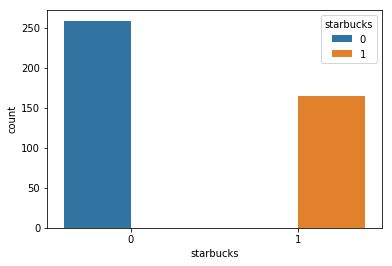

In [5]:
sns.countplot(data=star, x='starbucks', hue='starbucks')

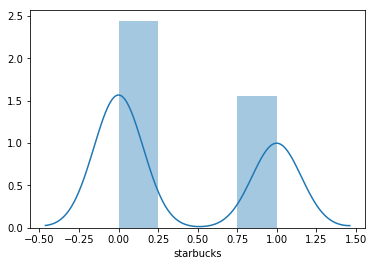

In [6]:
sns.distplot(star['starbucks'])

In [7]:
from random import randint
star=star.fillna(randint(1,5)) # 자료설명을 보면 5 이하의 데이터는 결측값으로 처리하였다고 나와있음

In [8]:
star.isna().sum()

dong_code                                          0
dong_name                                          0
starbucks                                          0
n_bank                                             0
n_starbucks                                        0
n_subway                                           0
male20to24_0                                       0
male20to24_1                                       0
male20to24_2                                       0
male20to24_3                                       0
male20to24_4                                       0
male20to24_5                                       0
male20to24_6                                       0
male20to24_7                                       0
male20to24_8                                       0
male20to24_9                                       0
male20to24_10                                      0
male20to24_11                                      0
male20to24_12                                 

In [9]:
#star=star.drop(['dong_code','dong_name','danger_name','n_starbucks'],axis=1)

In [10]:
st=star.drop(['dong_name','dong_code','n_starbucks','danger_name'],axis=1)

In [11]:
st.head()

,starbucks,n_bank,n_subway,male20to24_0,male20to24_1,male20to24_2,male20to24_3,male20to24_4,male20to24_5,male20to24_6,...,Interval_Move_move_out,City-to-city_transport_move_in,City-to-city_transport_move_out,a_single_house,a_multi-family_house,for_business_purposes,apartment,a_row_house,a_multi-family_house.1,House_in_Non-residential_Buildings
0,0,5,0,3237,3530,3527,3495,3620,4135,5574,...,34,21,51,4.0,4.0,4.0,206.0,4.0,4.0,4.0
1,0,6,0,23447,23664,23750,23704,23223,23207,23231,...,1366,1299,1824,4.0,190.0,107.0,6368.0,188.0,2948.0,107.0
2,1,9,3,30839,31284,31593,31687,31691,31620,31081,...,1210,1345,1707,4.0,205.0,155.0,4976.0,243.0,2109.0,139.0
3,0,1,0,5772,5665,5753,5895,6013,5867,5985,...,703,493,701,108.0,862.0,105.0,114.0,104.0,902.0,48.0
4,1,27,2,28906,28693,28853,29173,29607,30166,31355,...,1649,2575,2156,82.0,514.0,125.0,2707.0,193.0,998.0,71.0


In [12]:
X = st.iloc[:, st.columns != 'starbucks']
y = st.iloc[:, st.columns == 'starbucks']

In [13]:
from imblearn.over_sampling import SMOTE # 클래스 불균형 해결 

In [14]:
sm=SMOTE(ratio='auto',kind='regular')

In [15]:
X_r,y_r=sm.fit_sample(X,y)

In [16]:
X.columns

Index(['n_bank', 'n_subway', 'male20to24_0', 'male20to24_1', 'male20to24_2',
       'male20to24_3', 'male20to24_4', 'male20to24_5', 'male20to24_6',
       'male20to24_7',
       ...
       'Interval_Move_move_out', 'City-to-city_transport_move_in',
       'City-to-city_transport_move_out', 'a_single_house',
       'a_multi-family_house', 'for_business_purposes', 'apartment',
       'a_row_house', 'a_multi-family_house.1',
       'House_in_Non-residential_Buildings'],
      dtype='object', length=423)

In [17]:
X_r=pd.DataFrame(X_r)

In [18]:
X_r.columns=X.columns

In [19]:
X_r.head()

,n_bank,n_subway,male20to24_0,male20to24_1,male20to24_2,male20to24_3,male20to24_4,male20to24_5,male20to24_6,male20to24_7,...,Interval_Move_move_out,City-to-city_transport_move_in,City-to-city_transport_move_out,a_single_house,a_multi-family_house,for_business_purposes,apartment,a_row_house,a_multi-family_house.1,House_in_Non-residential_Buildings
0,5.0,0.0,3237.0,3530.0,3527.0,3495.0,3620.0,4135.0,5574.0,7199.0,...,34.0,21.0,51.0,4.0,4.0,4.0,206.0,4.0,4.0,4.0
1,6.0,0.0,23447.0,23664.0,23750.0,23704.0,23223.0,23207.0,23231.0,22833.0,...,1366.0,1299.0,1824.0,4.0,190.0,107.0,6368.0,188.0,2948.0,107.0
2,9.0,3.0,30839.0,31284.0,31593.0,31687.0,31691.0,31620.0,31081.0,30238.0,...,1210.0,1345.0,1707.0,4.0,205.0,155.0,4976.0,243.0,2109.0,139.0
3,1.0,0.0,5772.0,5665.0,5753.0,5895.0,6013.0,5867.0,5985.0,5838.0,...,703.0,493.0,701.0,108.0,862.0,105.0,114.0,104.0,902.0,48.0
4,27.0,2.0,28906.0,28693.0,28853.0,29173.0,29607.0,30166.0,31355.0,36324.0,...,1649.0,2575.0,2156.0,82.0,514.0,125.0,2707.0,193.0,998.0,71.0


In [20]:
y_r=pd.DataFrame(y_r)

In [21]:
y_r.columns=y.columns

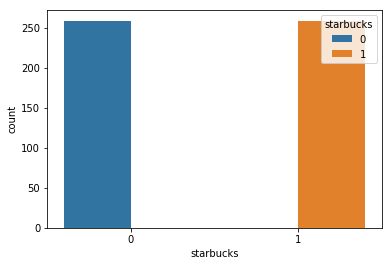

In [22]:
sns.countplot(data=y_r, x='starbucks', hue='starbucks')

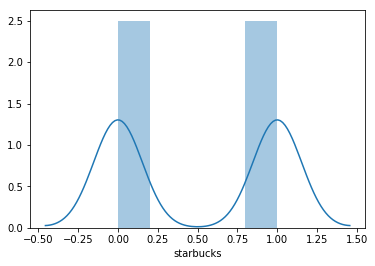

In [23]:
sns.distplot(y_r['starbucks'])

In [24]:
X.shape

(424, 423)

In [25]:
X_r.shape

(518, 423)

In [26]:
y.shape

(424, 1)

In [27]:
y_r.shape

(518, 1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_r,y_r,test_size = 0.3, random_state = 0)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(n_estimators=50, random_state=523, n_jobs=-1)
clf = clf.fit(X_train, y_train)

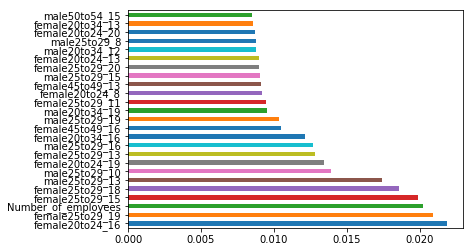

In [32]:
pd.Series(data=dict(zip(X_train.columns, clf.feature_importances_))).nlargest(25).plot(kind="barh");

In [33]:

from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(n_jobs=-1,verbose=100,random_state=523, n_estimators=50)
selector = RFECV(estimator, step=20, cv=5)
selector = selector.fit(X_train, y_train)
selector.support_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50building tree 5 of 50building tree 6 of 50

building tree 7 of 50building tree 8 of 50




building tree 9 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks    

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50
building tree 11 of 50

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 19 of 50building tree 20 of 50

[Parallel(n_jobs=-1)]: Done  11 tasks  

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 9 of 50building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s

building tree 18 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 19 of 50
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  41 out of  50 | elapsed

building tree 25 of 50
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
building tree 26 of 50
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 27 of 50
building tree 28 of 50building tree 29 of 50
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
building tree 30 of 50

building tree 31 of 50
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
building tree 32 of 50
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 33 of 50[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s

building tree 34 of 50
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
building tree 35 of 50
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
building tree 36 of 50
[Parallel(n_jobs=-1)]: Done  28 tasks     

building tree 36 of 50[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

building tree 37 of 50
building tree 38 of 50building tree 39 of 50

[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 40 of 50[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
building tree 41 of 50
building tree 42 of 50[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s

building tree 43 of 50

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 44 of 50building tree 45 of 50
building tree 46 of 50[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s

building 


[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks  

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50
building tree 7 of 50

building tree 8 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 16 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks    

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 15 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 22 of 50building tree 23 of 50

[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  15 tasks     

building tree 44 of 50[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 45 of 50
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 46 of 50
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 45 of 50building tree 46 of 50building tree 47 of 50

[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50building tree 49 of 50

[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 50 of 50
[Parallel(n_j

building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 26 of 50building tree 27 of 50
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 33 of 50
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
building tree 34 of 50
building tree 35 of 50[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s

building tree 36 of 50
building tree 37 of 50[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
building tree 38 of 50

[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 40 of 50
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
building tree 41 of 50
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
building tree 42 of 50
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
building tree 43 of 50
building tree 44 of 50building tree 45 of 50

[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 46 of 50building tree 47 of 50

[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50building tree 5 of 50



building tree 6 of 50building tree 7 of 50


building tree 8 of 50building tree 9 of 50

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50building tree 12 of 50

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s

building tree 16 of 50
building tree 17 of 50[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 18 of 50building tree 19 of 50
[Parallel(n_jobs

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50
building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 20 of 50
building tree 21 of 50building tree 22 of 50
building tree 23 of 50

[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1

building tree 46 of 50
building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
building tree 49 of 50building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:   

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

building tree 7 of 50
building tree 8 of 50building tree 9 of 50

building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
[Parallel(n_jobs=-1)]: Done  11 tasks 

building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 13 of 50building tree 14 of 50building tree 15 of 50


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 17 of 50
building tree 18 of 50building tree 19 of 50
building tree 20 of 50[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s


building tree 21 of 50
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 22 of 50
building tree 23 of 50
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 24 of 50
[Parallel(n_jobs=-1)]: Done  16 tasks     

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 14 of 50[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 18 of 50[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s

building tree 19 of 50
building tree 20 of 50[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
building tree 21 of 50

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 22 of 50
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 23 of 50[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 24 of 50
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
building tree 25 of 50
[Parallel(n_jobs=-1)]: Done  17 tasks     

building tree 36 of 50building tree 37 of 50
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
building tree 38 of 50
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
building tree 39 of 50
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 40 of 50building tree 41 of 50building tree 42 of 50
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s

building tree 43 of 50
building tree 44 of 50
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 45 of 50[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 46 of 50[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s

building

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50


building tree 8 of 50
building tree 9 of 50

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50

building tree 15 of 50
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50
building tree 18 of 50
[Parallel(n_jobs=-

building tree 39 of 50[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 40 of 50
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
building tree 41 of 50
building tree 42 of 50[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


building tree 43 of 50[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s

building tree 44 of 50[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 45 of 50
building tree 46 of 50

[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 18 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 19 of 50building tree 20 of 50

building tree 21 of 50
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
building tree 22 of 50[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
building tree 23 of 50[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s

building tree 24 of 50
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 25 of 50[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 26 of 50
building tree 27 of 50
building tree 28 of 50[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
building tree 29 of 50

[Parallel(n_jobs=-1)]: Done  21 tasks     

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

building tree 9 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
building tree 19 of 50[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done  12 tasks      |

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 45 of 50
building tree 46 of 50[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 47 of 50
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50

building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50building tree 50 of 50
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para


building tree 23 of 50
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
building tree 24 of 50[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s

building tree 25 of 50[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s

building tree 26 of 50
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
building tree 27 of 50[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s

building tree 28 of 50building tree 29 of 50

[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
building tree 30 of 50[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s

building tree 31 of 50[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s

building tree 32 of 50
building tree 33 of 50[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
building tree 34 of 50[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50building tree 11 of 50[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s

building tree 14 of 50building tree 15 of 50
building tree 16 of 50

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks    

building tree 9 of 50
building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
building tree 19 of 50
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s

building tree 20 of 50
building tree 21 of 50
building tree 22 of 

[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks  

[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 13 of 50building tree 14 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s

building tree 15 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 20 of 50
[Parallel(n_jobs=-1)]: Done  12 tasks      

[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 47 of 50
building tree 48 of 50
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 50 of 50[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s

[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

building tree 35 of 50building tree 36 of 50

[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
building tree 37 of 50building tree 38 of 50[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s


building tree 39 of 50
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.0s
building tree 40 of 50
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.0s
building tree 41 of 50building tree 42 of 50[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
building tree 43 of 50


[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    0.0s
building tree 44 of 50[Parallel(n_jobs=-1)]: Done  36 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 45 of 50[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:    0.0s remaining:    0.0s

building tree 46 of 50
[Par

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    0.0s
[Para

[Parallel(n_jobs=8)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  27 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  32 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Do

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s

building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50building tree 14 of 50building tree 15 of 50[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s



building tree 16 of 50building tree 17 of 50
building tree 18 of 50
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
building tree 19 of 50

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
building tree 20 of 50

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 9 of 50


building tree 10 of 50building tree 11 of 50

building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50building tree 8 of 50

building tree 9 of 50
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
building tree 10 of 50building tree 11 of 50
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
building tree 12 of 50
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s

building tree 13 of 50
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50
building tree 15 of 50
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
building tree 16 of 50building tree 17 of 50

building tree 18 of 50
building tree 19 of 50building tree 20 of 50
[Parallel(n_jobs=-1)]: Done   8 tas

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
building tree 11 of 50[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s

building tree 12 of 50
building tree 13 of 50[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
building tree 14 of 50

[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
building tree 15 of 50
building tree 16 of 50[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s

building tree 17 of 50
[Parallel(n_jobs=-1)]: Done   9 tasks    

[Parallel(n_jobs=-1)]: Done  40 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 49 of 50[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.0s remaining:    0.0s
building tree 50 of 50

[Parallel(n_jobs=-1)]: Done  42 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


array([ True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True,  True,

In [45]:
?RandomForestClassifier

Optimal number of features : 303


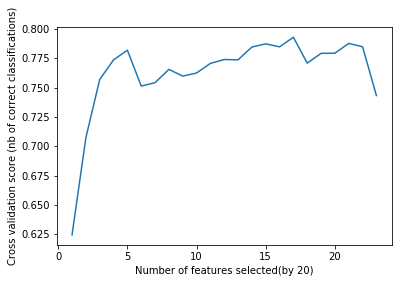

In [34]:
import matplotlib.pyplot as plt
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected(by 20)")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [35]:
X_train_new=X_train[X_train.columns[selector.support_]]
X_test_new=X_test[X_test.columns[selector.support_]]

In [88]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
random_state=[523]
param_grid = dict(n_estimators=n_estimators,random_state=random_state)

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, n_jobs=-1)
grid_result = grid_search.fit(X_train_new, y_train)

In [68]:
?param_grid

In [90]:
grid_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=178,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=523, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [92]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=178,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=523, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [93]:
from sklearn.model_selection import cross_val_score
xgb_scores = cross_val_score(xgb, X_train_new, y_train, cv=10)
print('Scores =', xgb_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(xgb_scores), np.std(xgb_scores)))

Scores = [0.71052632 0.83333333 0.91666667 0.80555556 0.75       0.86111111
 0.72222222 0.80555556 0.63888889 0.77777778]
CV accuracy: 0.782 +/- 0.076


In [94]:
xgb_model=xgb.fit(X_train_new, y_train)

In [95]:
from sklearn.metrics import classification_report
y_pred=xgb_model.predict(X_test_new)
# classification matrix
print('\nClassification metrics')
print(classification_report(y_true=y_test, y_pred=y_pred))


Classification metrics
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        88
           1       0.71      0.90      0.79        68

   micro avg       0.79      0.79      0.79       156
   macro avg       0.80      0.81      0.79       156
weighted avg       0.82      0.79      0.80       156

